# ***1.다양한 단어표현 방법***

# 1) 단어의 표현 방법

국소표현: 단어 각각에 특정값 맵핑

분산표현: 주변을 참고하여 단어를 표현

ex. puppy-1번, cute-2번, lovely-3번 : 국소표현

puppy: cute, lovely한 느낌이다: 분산표현



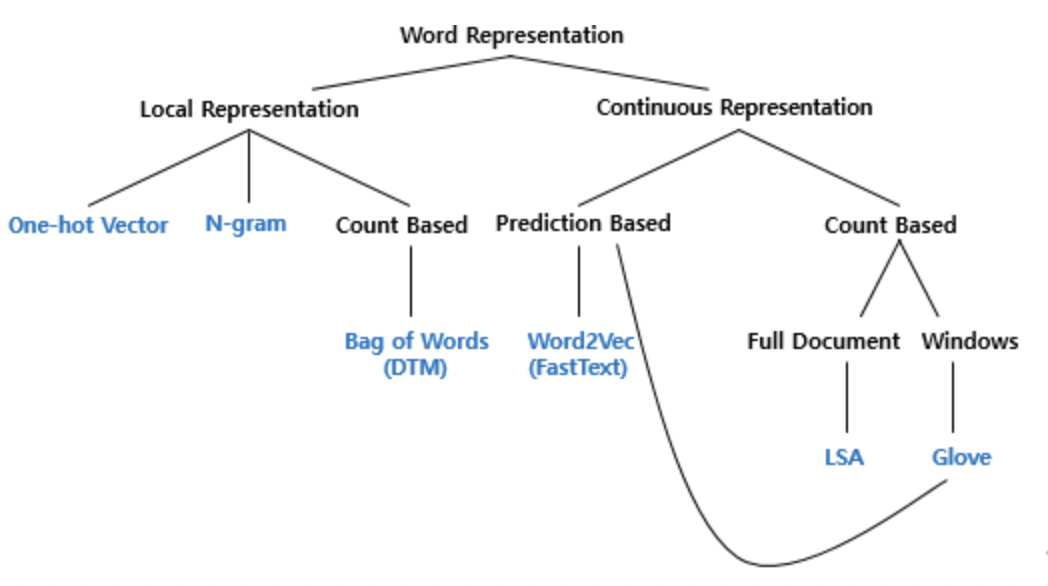

# **2. Bag of Words(BoW)**

# 1) Bag of Words?

순서 고려하지 않고, **빈도**에만 집중하는 수치화 표현 방법

**-> 텍스트 내 어떤 단어들이 중요한지(많이 등장하는지) 보기 위함**

(1) 각 단어에 고유한 정수 인덱스 부여

(2) 각 인덱스에 토큰의 등장 횟수를 기록한 벡터(bow)를 만든다.

bow는 문서가 어떤 성격의 문서인지 판단하는 작업에 쓰인다.

ex. '달리기', '체력', '근력' -> 체육관련

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [ ]:
# 예시

from konlpy.tag import Okt
import re
okt = Okt()

# 온점 제거
sent = re.sub('\.', '', '정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.')

# 형태소 분석기로 토큰화, 이후 token에 넣음

tokens = okt.morphs(sent)
print(tokens)
word2index = {}
bow = []
for token in tokens:
  if token not in word2index.keys(): 
    word2index[token] = len(word2index) # 1씩 증가하는 len 이용하여 순서대로 인덱싱
    bow.insert(len(word2index)-1, 1) # 0번째 자리부터 1씩 채워넣음
    # 즉 전체에 기본값 1 넣음
  else: #재등장할 경우
    index = word2index.get(token) # 재등장 voca의 value를 반환(ex.1)
    bow[index] = bow[index] + 1 # bow에서 인덱싱으로 +1

print(word2index)
print(bow) 

['정부', '가', '발표', '하는', '물가상승률', '과', '소비자', '가', '느끼는', '물가상승률', '은', '다르다']
{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [ ]:
from konlpy.tag import Okt
okt = Okt()
token = re.sub('\.', '', '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.')
token = okt.morphs(token)

word2index = {}
bow = []
for voca in token:
  if voca not in word2index:
    word2index[voca] = len(word2index)
    bow.insert(len(word2index)-1, 1)
  else:
    index = word2index.get(voca)
    bow[index] = bow[index] + 1

print(word2index)
print(bow)

{'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


# 2) CountVectorizer 클래스로 bow 만들기

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

print(vector.fit_transform(corpus))# 단어 인덱스별 빈도
print(vector.fit_transform(corpus).toarray()) # 빈도수를 임의로 배열화
print(vector.vocabulary_) # word2index

  (0, 3)	2
  (0, 0)	1
  (0, 2)	1
  (0, 4)	1
  (0, 1)	2
[[1 2 1 2 1]]
{'you': 3, 'know': 0, 'want': 2, 'your': 4, 'love': 1}


CountVectorizer() - **단어길이 2 이상인 문자**만 토큰으로 인식함. (I 미포함)

fit_transform: (훈련데이터) 분포 학습하고, 각 데이터의 스케일을 같게 만들어준다.

**띄어쓰기**만을 기준으로 단어를 자르므로, 한국어의 경우 bow 제대로 만들어지지 않음.

# 3) 불용어를 제거한 bow 만들기

In [ ]:
# 사용자 정의 불용어 사용: CountVectorizer() 괄호 내 stop_words 지정

from sklearn.feature_extraction.text import CountVectorizer

text = ["Family is not an important thing. It's everything."]
vector = CountVectorizer(stop_words=['the', 'a', 'an', 'is', 'not'])
print(vector.fit_transform(text).toarray())
print(vector.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [ ]:
# 자체(사이킷런) 불용어 사용

from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words='english')
print(vector.fit_transform(text).toarray())
print(vector.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# NLTK 불용어 사용
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text = ["Family is not an important thing. It's everything."]
sw = stopwords.words('english')
vector = CountVectorizer(stop_words= sw)
print(vector.fit_transform(text).toarray())
print(vector.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# **3. 문서 단어 행렬(DTM, document-term matrix)**

문서별 단어들의 빈도를 행렬로 표현

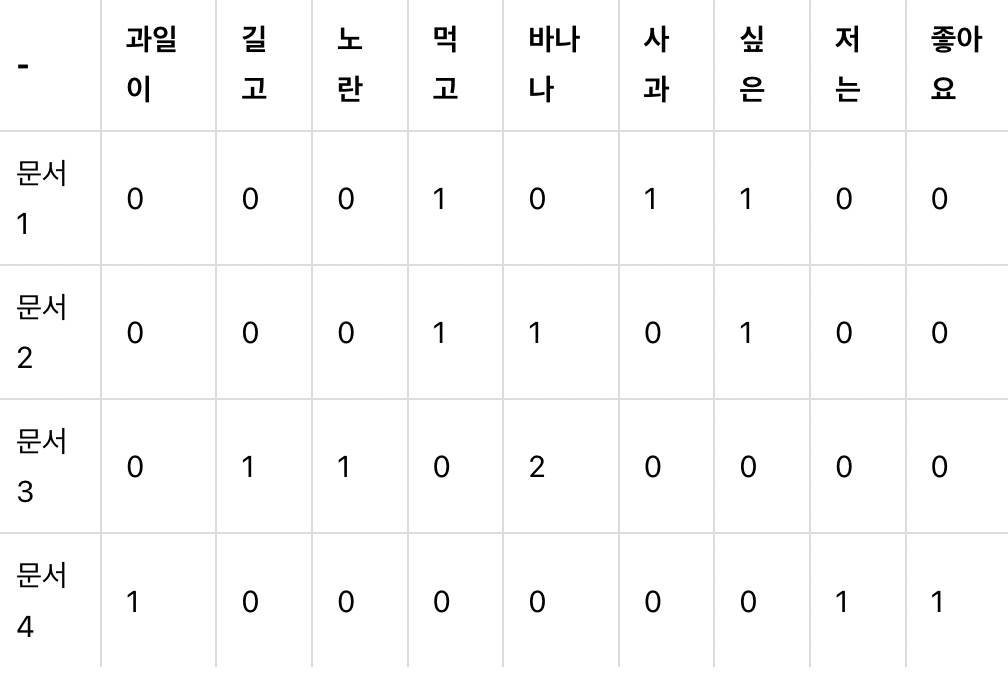

한계

* 희소 표현(대부분의 값이 0, 공간적 낭비)

원-핫 벡터와 마찬가지임.

* 단순 빈도수 기반 접근

ex. the의 빈도수가 유사하다고, 비슷한 문서라고 판단 불가.

-> 불용어 처리 중요.

# **4. TF-IDF (term frequency-inverse document frequency)**

각 단어마다 중요도를 가중치로 주는 방법

DTM 만든 후, TF-IDF 가중치를 부여한다.

문서의 유사도, 특정 단어의 중요도 등 파악 가능


# 1) TF-IDF?

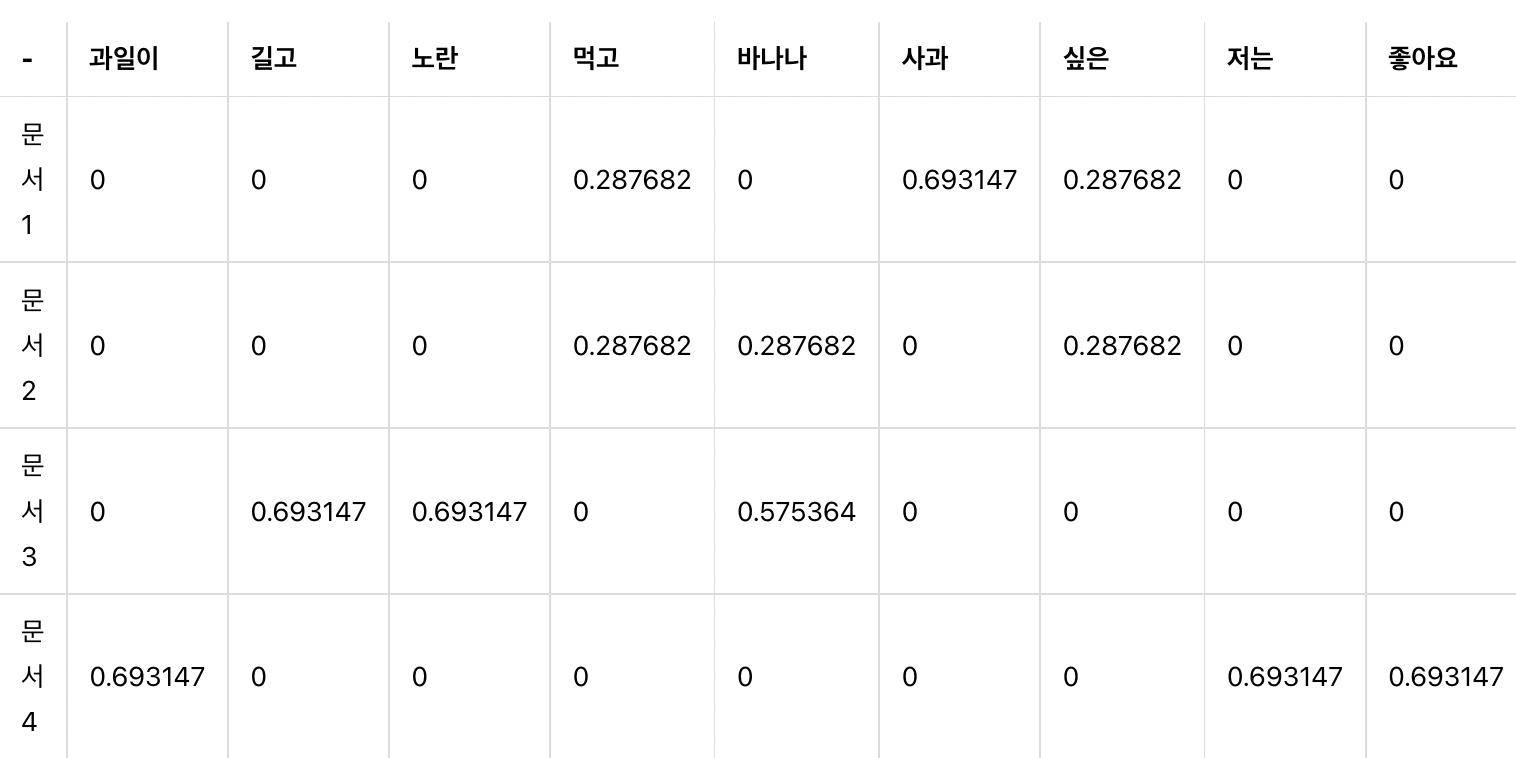



tf(d,t) : 문서 d에서 단어 t의 등장 횟수 (tf: DTM에서 구한 빈도)

df(t): t가 등장한 문서의 수

idf(d,t): df(t)에 반비례하는 수






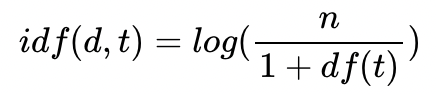

ex. n = 1,000,000 (분모에 +1 없을 때)

* df(t) = 1, idf(d,t) = 6

* df(t) = 100, idf(d,t) = 4 ...

log 없을 시

* df(t) = 1, idf(d,t) = 1,000,000 (등장하는 문서가 하나뿐)

* df(t) = 100, idf(d,t) = 10,000.... (등장하는 문서가 100개)

**즉 로그를 사용해야 idf 값이 지나치게 커지지 않는다.**

희귀 단어들에 지나치게 큰 가중치가 부여될 수 있다.

분모에 1 더해주는 이유는, df(t)=0일 때를 대비하기 위함이다.

TF-IDF: 특정 문서에서만 자주 등장하는 단어를 중요하다고 판단한다. (클수록 중요)

-> 불용어(모든 문서에서 자주 등장)는 낮은 값을 지님.

보통 자연로그(Inx)를 사용한다.

# 2) 파이썬으로 TF-IDF 구현하기

In [ ]:
import pandas as pd
from math import log

In [ ]:
docs = [
        '먹고 싶은 사과',
        '먹고 싶은 바나나',
        '길고 노란 바나나 바나나',
        '저는 과일이 좋아요'
]
# 단어 하나하나 중복 제거해서 리스트로
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
# TF 구하기 (DTM form)
N = len(docs)

def tf(t,d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc # t in doc: doc 내에 t의 개수 (int)
  return log(N/(df + 1))

def tfidf(t,d):
  return tf(t,d) * idf(t)

In [ ]:
def idf(t):
  df = 0
  for doc in ['먹고 싶은 사과', '먹고 싶은 바나나']:
    df += t in doc
  return df

idf('먹고')

2

In [ ]:
result = []
for i in range(N):
  result.append([])
  d = docs[i] # 1번~N번 문서 각각 다룸
  for j in range(len(vocab)):
    t = vocab[j] # 단어 하나하나
    result[-1].append(tf(t,d))

tf_ = pd.DataFrame(result, columns=vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)): # 9개
    t = vocab[j]
    result[-1].append(tf(t,d))
result

[[0, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 0, 1, 0, 0],
 [0, 1, 1, 0, 2, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 1]]

In [ ]:
# IDF값 구하기

result = []
for j in range(len(vocab)):
  t = vocab[j]
  result.append(idf(t))

idf_=pd.DataFrame(result, index = vocab, columns = ['IDF'])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [ ]:
# TF-IDF 행렬 출력

result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]

    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns= vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


# 3) 사이킷런 이용한 DTM, TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
          'you know I want your love',
          'I like you',
          'what should I do'
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
          'you know I want your love',
          'I like you',
          'what should I do'
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

# 차이는 있지만 의도는 동일

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
